In [36]:
import numpy as np
from keras import layers, models
from keras.datasets import reuters

In [37]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=1000)

In [39]:
word_index = reuters.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])
for _ in train_data[0]:
  print(word_index.get(_ -3))

None
None
None
said
as
a
result
of
its
december
acquisition
of
None
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
None
None
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
None
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [40]:
train_labels[0]

3

In [41]:
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences), dim))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

In [42]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [43]:
train_labels[1]

4

In [44]:
from keras.utils import to_categorical

In [45]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [46]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [59]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [60]:
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])



In [61]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [62]:
history = model.fit(partial_x_train, partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.3506 - loss: 3.3319 - val_accuracy: 0.5770 - val_loss: 1.9549
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6236 - loss: 1.8086 - val_accuracy: 0.6740 - val_loss: 1.4862
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6872 - loss: 1.4225 - val_accuracy: 0.7020 - val_loss: 1.3052
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7225 - loss: 1.2278 - val_accuracy: 0.7270 - val_loss: 1.2044
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7553 - loss: 1.1350 - val_accuracy: 0.7460 - val_loss: 1.1402
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7785 - loss: 1.0125 - val_accuracy: 0.7590 - val_loss: 1.0953
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7961 - loss: 0.9170 - val_accuracy: 0.7660 - val_loss: 1.0347
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8025 - loss: 0.8586 - val_accuracy: 0.7700 - val_loss

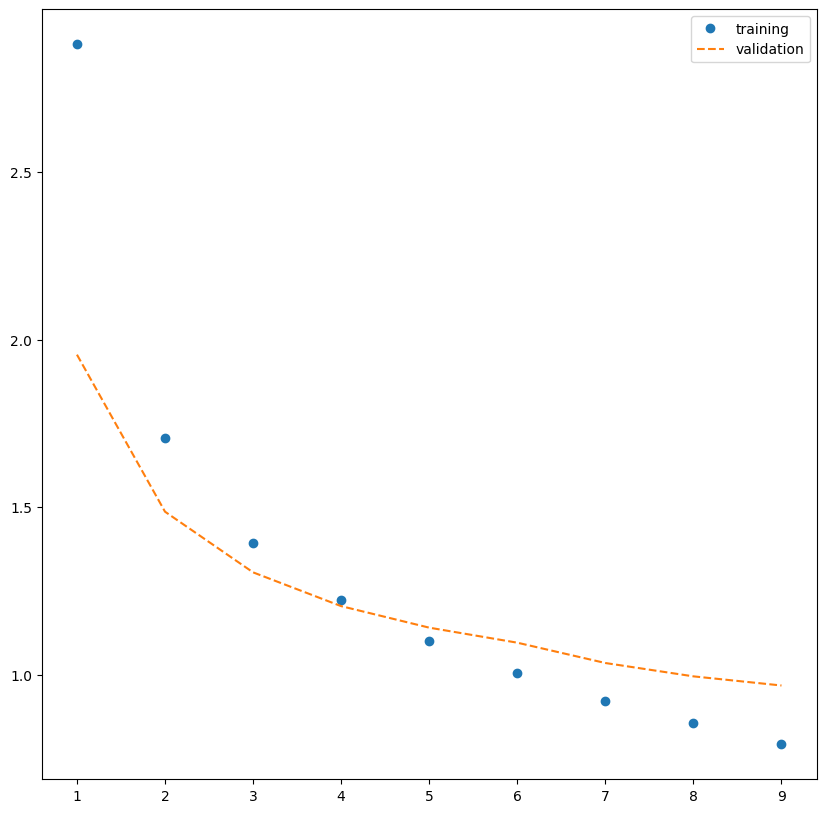

In [63]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

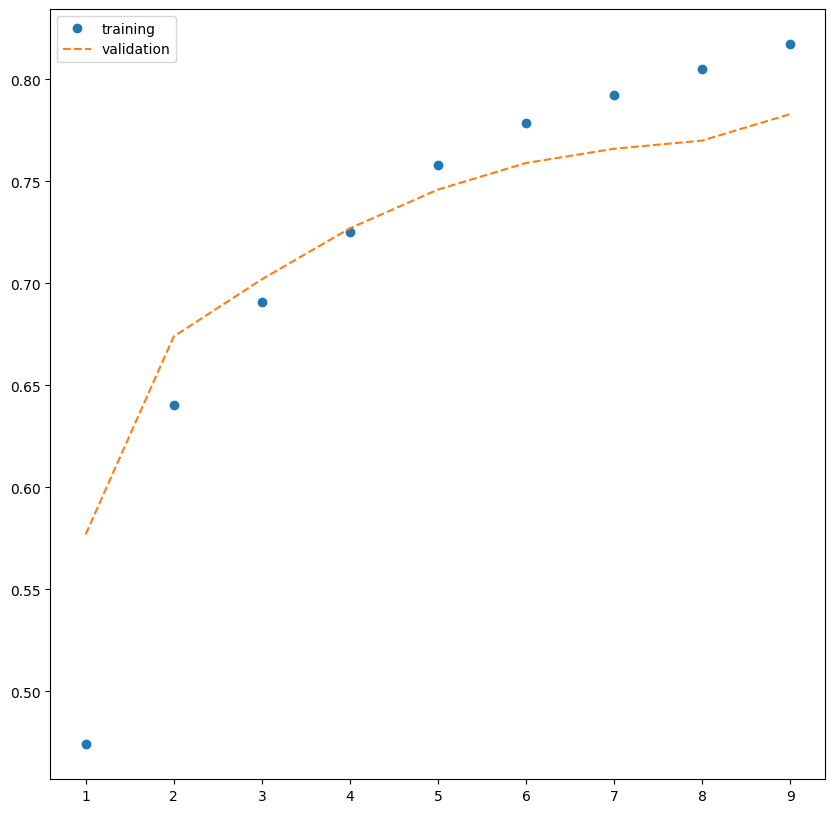

In [64]:
history_dict = history.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']

fig = plt.figure(figsize=(10,10))
epoch = range(1, len(loss_values) + 1)
plt.plot(epoch, loss_values, 'o', label = 'training')
plt.plot(epoch, val_loss_values, '--', label = 'validation')
plt.legend()
plt.show()

In [66]:
model.evaluate(x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7627 - loss: 1.0326


[1.054747223854065, 0.754229724407196]

In [67]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [69]:
np.sum(predictions[0])

1.0000001

In [70]:
np.argmax(predictions[0])

3